# 第6章 数理统计

## 6.3 区间估计

In [1]:
import numpy as np

np.random.seed(8899)   # 生成随机数的种子，能够保证每次执行本程序，都生成同样的随机数
n = 100
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

Text(0.5, 1.0, '95% Confidence Intervals for mean of 0')

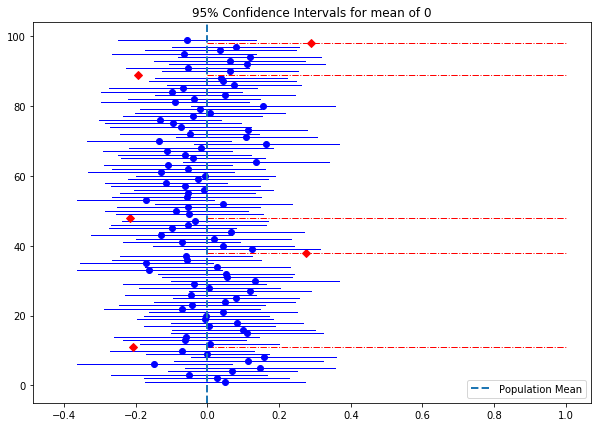

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats 
fig, ax = plt.subplots(figsize=(10, 7))

for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])    # 样本均值
    se = stats.sem(samples[i])           # 样本标准差
    sample_ci = stats.norm.interval(0.95, sample_mean, se)    # 置信水平为0.95的置信区间
    # 绘制置信区间和样本均值
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1)
        plt.plot(np.mean(samples[i]), i, 'bo')
    else:
        plt.plot(sample_ci[0], sample_ci[1], (i, i), color='red', linewidth=1, linestyle='-.')
        plt.plot(np.mean(samples[i]), i, color='red', marker='D')

plt.axvline(x=0, ymin=0, ymax=1, linestyle="--", linewidth=2, label='Population Mean')
plt.legend(loc='best')
plt.title('95% Confidence Intervals for mean of 0')

In [3]:
from scipy import stats
import numpy as np
stats.norm.interval(0.95, loc=1.20, scale=1/np.sqrt(16))

(0.7100090038649864, 1.6899909961350135)

## 6.4 参数检验

### 6.4.1 基本概念

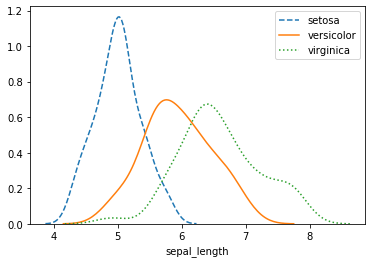

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
setosa = iris[iris['species']=='setosa']['sepal_length']
versicolor = iris[iris['species']=='versicolor']['sepal_length']
virginica = iris[iris['species']=='virginica']['sepal_length']
sns.distplot(setosa, kde=True, hist=False,label='setosa', kde_kws={"linestyle":"--"})
sns.distplot(versicolor, kde=True, hist=False, label='versicolor', kde_kws={"linestyle":"-"})
sns.distplot(virginica, kde=True, hist=False, label='virginica', kde_kws={"linestyle":":"})

In [2]:
setosa.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64

### 6.4.2 正态总体均值的假设检验

In [3]:
from statsmodels.stats.weightstats import ztest
ztest(setosa, value=4.5)

(10.150538987647847, 3.295383521651256e-24)

In [6]:
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW as smstat

np.random.seed(7654567)
rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 2))    # 创建服从正态分布的观测数据

smstat(rvs).ttest_mean([5.0, 0.0])

(array([-0.68014479,  4.11038784]),
 array([4.99613833e-01, 1.49986458e-04]),
 49.0)

In [7]:
from scipy import stats
stats.ttest_1samp(rvs,[5.0,0.0])

Ttest_1sampResult(statistic=array([-0.68014479,  4.11038784]), pvalue=array([4.99613833e-01, 1.49986458e-04]))

In [9]:
import numpy as np
from scipy import stats

np.random.seed(728)

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)    # 生成两个服从正态分布的观测数据
rvs2 = stats.norm.rvs(loc=8, scale=20, size=100)

stats.ttest_ind(rvs1, rvs2, equal_var = False)    # equal_var=False，即总体标准差不同

Ttest_indResult(statistic=-1.3731744943633437, pvalue=0.1725630411434839)

In [10]:
r = [0.30, 0.23, 0.41, 0.53, 0.24, 0.36, 0.38, 0.51]    # 人对红光的反应时间
g = [0.43, 0.32, 0.58, 0.46, 0.27, 0.41, 0.38, 0.61]    # 人对绿光的反应时间

In [11]:
stats.ttest_rel(r, g)

Ttest_relResult(statistic=-2.311250817605121, pvalue=0.05408703689705545)

### 6.4.5 用假设检验比较模型

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

score1 = model1.fit(X_train, y_train).score(X_test, y_test)
score2 = model2.fit(X_train, y_train).score(X_test, y_test)

print(f'Logistic regression accuracy: {score1*100:.2f}%')
print(f'Decision tree accuracy: {score2*100:.2f}%')

Logistic regression accuracy: 97.37%
Decision tree accuracy: 94.74%


In [14]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)

print(f'P-value: {p:.3f}, t-Statistic: {t:.3f}')

if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

P-value: 1.000, t-Statistic: 0.000
Algorithms probably have the same performance


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model3 = DecisionTreeClassifier(max_depth=1)
score3 = model3.fit(X_train, y_train).score(X_test, y_test)

print(f'Decision tree accuracy: {score3*100:.2f}%')

t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model3, X=X, y=y, scoring='accuracy', random_seed=1)

print(f'P-value: {p:.3f}, t-Statistic: {t:.3f}')

if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

Decision tree accuracy: 63.16%


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

P-value: 0.001, t-Statistic: 7.269
Difference between mean performance is probably real


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6.5 非参数检验

### 6.5.1 拟合优度检验

In [16]:
from scipy.stats import chisquare
chisquare([1e10-1e6, 1e10+1.5e6, 1e10-2e6, 1e10+4e6, 1e10-3e6, 1e10+0.5e6])

Power_divergenceResult(statistic=3250.0, pvalue=0.0)

In [17]:
from scipy.stats import chi2
chi2.isf(0.05, (6-1))

11.070497693516355

In [18]:
p_value = 1 - chi2.cdf(3250.0, (6-1))
print(p_value)

0.0


In [19]:
from scipy.stats import poisson

pi = [poisson.pmf(k=i, mu=0.69) for i in range(0,3)]
p4 = 1 - sum(pi)
pi.append(p4)
print(pi)

[0.5015760690660556, 0.3460874876555783, 0.11940018324117453, 0.032936260037191634]


In [20]:
import numpy as np
chisquare([223, 142, 48, 19], f_exp=np.array(pi)*432, ddof=1)

Power_divergenceResult(statistic=2.410235253667352, pvalue=0.2996567497654643)

In [21]:
chi2.isf(0.05, (4-1-1))

5.991464547107983

In [22]:
p_value = 1 - chi2.cdf(2.41, (4-1-1))
print(p_value)

0.2996919995132463


### 6.5.2 列链表检验

In [23]:
from scipy.stats import chi2_contingency
import pandas as pd
df = pd.DataFrame({'smoker':[39,15],'no_smoker':[21,25]})
chi2_contingency(df, correction=False)

(7.306763285024157,
 0.006869555272453766,
 1,
 array([[32.4, 27.6],
        [21.6, 18.4]]))

In [24]:
from scipy.stats import chi2
chi2.isf(0.01, 1)

6.634896601021217

In [193]:
chisquare([223,142,48,19], f_exp=[0.502*432,0.346*432,0.119*432,0.033*432], ddof=2)

Power_divergenceResult(statistic=2.351731742258605, pvalue=0.12514391755070803)

In [194]:
chi2.isf(0.05, 2)

5.991464547107983

In [195]:
1-chi2.cdf(2.3517,2)

0.30855659508453925

In [212]:
chi_2 = chisquare([6,16,17,26,11,9,9,6], f_exp=[7.8,13.2, 18.5, 19.4, 16.3, 11.4, 6.9, 6.5], ddof=1)
chi_2

Power_divergenceResult(statistic=6.282474470262367, pvalue=0.392302383997154)

In [213]:
p_value = 1 - chi2.cdf(6.281, 6)
p_value

0.39245964232646136

In [206]:
chi_2

In [175]:
mu = 4.2

In [176]:
from scipy.stats import poisson

In [184]:
poisson.pmf(k=0, mu=mu)

0.014995576820477703

In [182]:
poisson.pmf(k=2, mu=mu)

0.13226098755661336

In [183]:
poisson.pmf(k=3, mu=mu)

0.1851653825792587

In [186]:
pi = [poisson.pmf(k=i, mu=mu) for i in range(13)]

In [187]:
npi = 100*np.array(pi)

In [208]:
chisquare([1,5,16,17,26,11,9,9,2,1,2,1,0], f_exp=npi, ddof=1)

Power_divergenceResult(statistic=11.71275332659663, pvalue=0.38561734563165234)

In [216]:
p_value = 1 - chi2.cdf(11.7128, 13-1-1)

In [217]:
p_value

0.3856137138479808

In [197]:
chisquare([1e10-1e6, 1e10+1.5e6, 1e10-2e6, 1e10+4e6, 1e10-3e6, 1e10+0.5e6], ddof=4)

Power_divergenceResult(statistic=3250.0, pvalue=0.0)

In [207]:
p_value = 1 - chi2.cdf(3250.0, 5)
print(p_value)

0.0


In [231]:
import numpy as np

f_i = np.array([1,5,16,17,26,11,9,9,2,1,2,1])
alpha = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
alpha_mean = np.sum(f_i * alpha)/100
print(alpha_mean)

4.2


In [232]:
pi

[0.014995576820477703,
 0.06298142264600638,
 0.13226098755661336,
 0.1851653825792587,
 0.19442365170822168,
 0.1633158674349063,
 0.11432110720443431,
 0.0685926643226606,
 0.03601114876939682,
 0.01680520275905187,
 0.007058185158801781,
 0.0026949434242697717,
 0.0009432301984944207]

In [222]:
alpha = [0,1,2,3,4,5,6,7,8,9,10,11]


In [229]:
total_alpha = np.array(f_i)*np.array(alpha)
total_alpha

array([  0,   5,  32,  51, 104,  55,  54,  63,  16,   9,  20,  11])

In [230]:
np.sum(total_alpha)/100

4.2

In [233]:
299/432

0.6921296296296297

In [252]:
from scipy.stats import poisson
import numpy as np

pi = [poisson.pmf(k=i, mu=0.69) for i in range(0,3)]
p4 = 1 - sum(pi)
pi.append(p4)
print(pi)

[0.5015760690660556, 0.3460874876555783, 0.11940018324117453, 0.032936260037191634]


In [255]:
import numpy as np
chisquare([223, 142, 48, 19], f_exp=np.array(pi)*432, ddof=1)

Power_divergenceResult(statistic=2.410235253667352, pvalue=0.2996567497654643)

In [257]:
chisquare([223,142,48,19], f_exp=[0.502*432,0.346*432,0.119*432,0.033*432], ddof=1)

Power_divergenceResult(statistic=2.351731742258605, pvalue=0.308551697981783)

In [258]:
np.array(pi)*432

array([216.68086184, 149.50979467,  51.58087916,  14.22846434])

In [259]:
[0.502*432,0.346*432,0.119*432,0.033*432]

[216.864, 149.47199999999998, 51.408, 14.256]

In [260]:
chi2.isf(0.05, (4-1-1))

5.991464547107983

In [261]:
p_value = 1 - chi2.cdf(2.41, (4-1-1))
print(p_value)

0.2996919995132463


In [263]:
from scipy.stats import chi2_contingency

In [264]:
import pandas as pd

In [272]:
from scipy.stats import chi2_contingency
import pandas as pd
df = pd.DataFrame({'smoker':[39,15],'no_smoker':[21,25]})
chi2_contingency(df, correction=False)

(7.306763285024157,
 0.006869555272453766,
 1,
 array([[32.4, 27.6],
        [21.6, 18.4]]))

In [271]:
chi2_contingency([[39,21],[15,25]], correction=False)

(7.306763285024157,
 0.006869555272453766,
 1,
 array([[32.4, 27.6],
        [21.6, 18.4]]))

In [269]:
df

,yes,no
0,39,21
1,15,25


In [274]:
from scipy.stats import chi2
chi2.isf(0.01, 1)

6.634896601021217

In [276]:
p_value = 1 - chi2.cdf(7.3068, 1)
print(p_value)

0.006869414912642924


In [278]:
df = pd.DataFrame({'shou':[32,133],'normal':[40,121],'heavy':[59,106]})
chi2_contingency(df, correction=False)

(11.705404438710113,
 0.002872127543874838,
 2,
 array([[ 44.02240326,  42.95519348,  44.02240326],
        [120.97759674, 118.04480652, 120.97759674]]))